# 1. Wczytanie i podgląd zbioru Digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd

Liczba próbek: 1797
Liczba cech: 64
Unikalne klasy: [0 1 2 3 4 5 6 7 8 9]


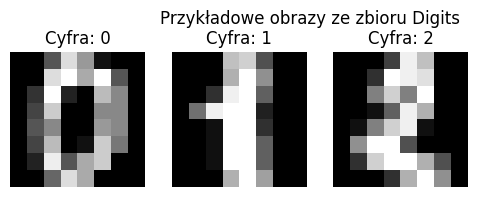

Liczba obserwacji (wierszy): 1797
Liczba cech (kolumn): 64
Rozmiar pojedynczego obrazu: (8, 8)


In [2]:
# zaladowanie danych
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images

# informacje o zbiorze
print("Liczba próbek:", X.shape[0])
print("Liczba cech:", X.shape[1])
print("Unikalne klasy:", np.unique(y))

# wyswietlenie przykladowych cyfr
plt.figure(figsize=(8, 4))
for i in range(3):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Cyfra: {y[i]}")
    plt.axis('off')

plt.suptitle("Przykładowe obrazy ze zbioru Digits")
plt.show()

print(f"Liczba obserwacji (wierszy): {X.shape[0]}")
print(f"Liczba cech (kolumn): {X.shape[1]}")
print(f"Rozmiar pojedynczego obrazu: {images[0].shape}")

In [3]:
# tworzenie nazw kolumn - piksele
pixel_columns = [f"pixel_{i}" for i in range(X.shape[1])]

# tworzenie dataframu ze zbioru
df_digits = pd.DataFrame(X, columns=pixel_columns)

# dodanie kolumny z etykieta
df_digits["digit"] = y

display(df_digits)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# 2. Algorytm k-means

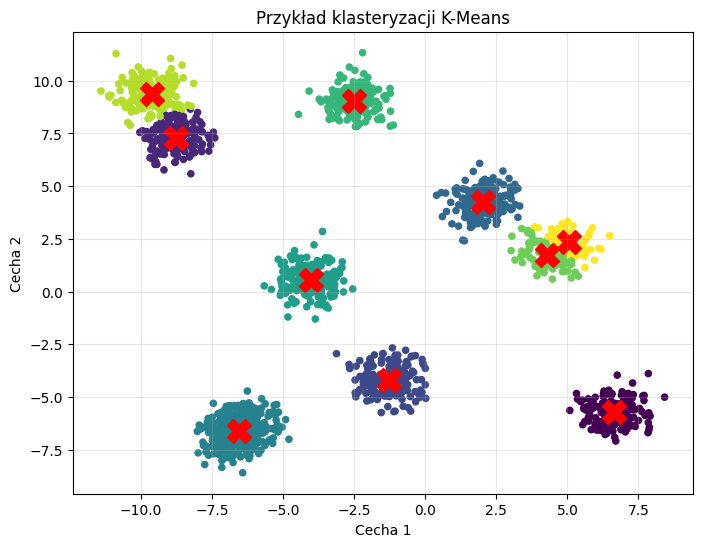

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

LICZBA_GRUP = 10
ILOSC_DANYCH = 1797
ROZRZUT = 0.6

# dane - trzeba zwrocic uwage ze 2D - poglądowo
X, _ = make_blobs(
    n_samples=ILOSC_DANYCH,
    centers=LICZBA_GRUP,
    cluster_std=ROZRZUT,
    random_state=42
)

# k-means
kmeans = KMeans(n_clusters=LICZBA_GRUP, random_state=42)
labels = kmeans.fit_predict(X)

# wizualizacja
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red', s=300, marker='X'
)

plt.title("Przykład klasteryzacji K-Means")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.grid(alpha=0.3)
plt.show()

Wyjaśniona wariancja PCA: [0.14890594 0.13618771]


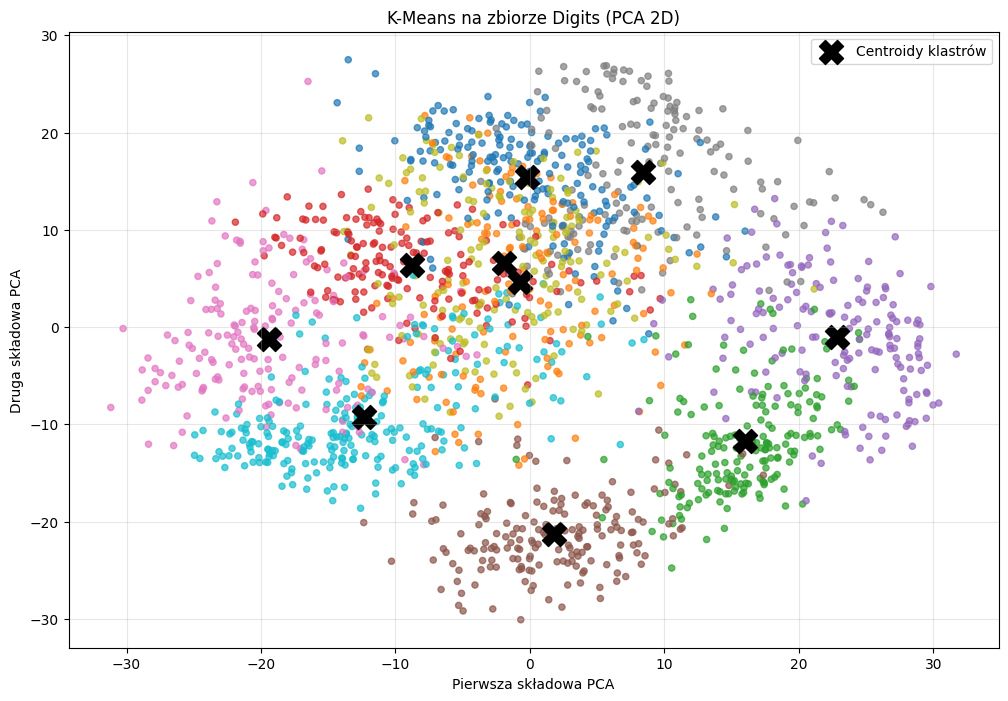

In [6]:
from sklearn.decomposition import PCA

X = df_digits.drop(columns=["digit"]).values
y = df_digits["digit"].values

# redukcja wielowymiarowosci - PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("Wyjaśniona wariancja PCA:", pca.explained_variance_ratio_)

LICZBA_KLASTROW = 10  # cyfry 0–9

kmeans = KMeans(n_clusters=LICZBA_KLASTROW, random_state=42)
labels = kmeans.fit_predict(X)

# centroidy przeniesione do PCA
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))

# obrazy cyfr, punkty
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap="tab10",
    s=20,
    alpha=0.7
)

# centroidy klastrow
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    c="black",
    s=300,
    marker="X",
    label="Centroidy klastrów"
)

plt.title("K-Means na zbiorze Digits (PCA 2D)")
plt.xlabel("Pierwsza składowa PCA")
plt.ylabel("Druga składowa PCA")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3. Algorytm DBSCAN

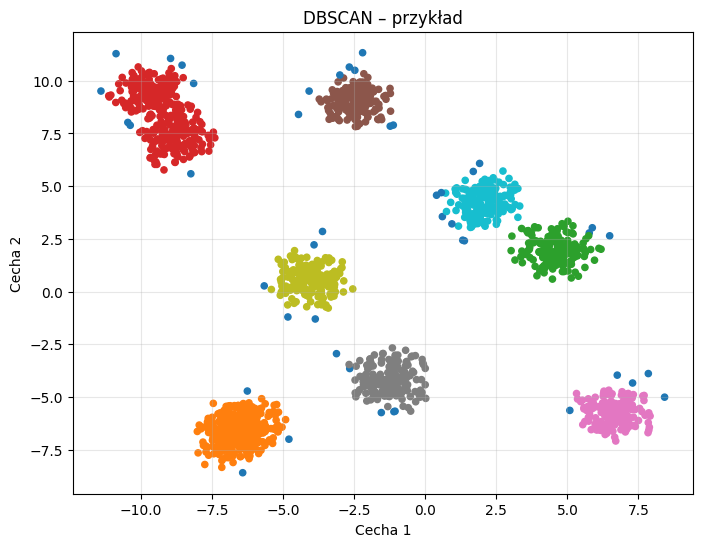

In [10]:
from sklearn.cluster import DBSCAN

LICZBA_GRUP = 10
ILOSC_DANYCH = 1797
ROZRZUT = 0.6

# dane 2D – poglądowo
X, _ = make_blobs(
    n_samples=ILOSC_DANYCH,
    centers=LICZBA_GRUP,
    cluster_std=ROZRZUT,
    random_state=42
)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X)

# wizualizacja
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='tab10',
    s=20
)

plt.title("DBSCAN – przykład")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.grid(alpha=0.3)
plt.show()

Wyjaśniona wariancja PCA: [0.14890594 0.13618771]
Liczba klastrów: 2
Liczba punktów uznanych za szum: 45


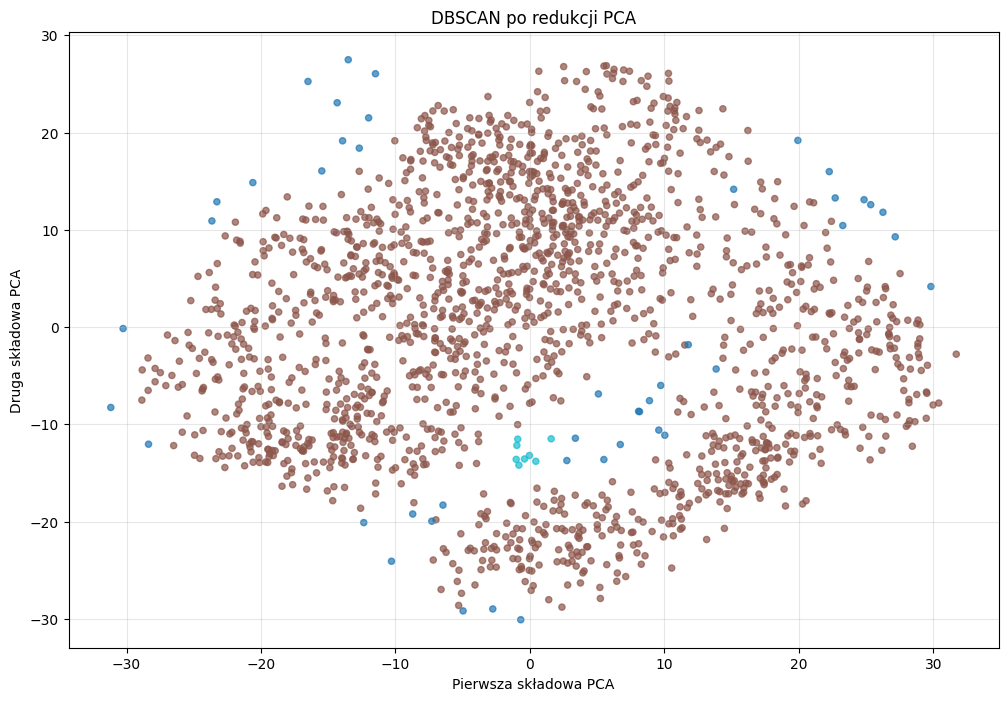

In [14]:
# teraz DBSCAN z uzyciem PCA
X = df_digits.drop(columns=["digit"]).values
y = df_digits["digit"].values

# PCA do 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("Wyjaśniona wariancja PCA:", pca.explained_variance_ratio_)

# DBSCAN – parametry dobrane eksperymentalnie
dbscan = DBSCAN(eps=2.5, min_samples=8)
labels_dbscan = dbscan.fit_predict(X_pca)

# liczba wykrytych klastrów (bez szumu)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = np.sum(labels_dbscan == -1)

print("Liczba klastrów:", n_clusters)
print("Liczba punktów uznanych za szum:", n_noise)

plt.figure(figsize=(12, 8))

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_dbscan,
    cmap="tab10",
    s=20,
    alpha=0.7
)

plt.title("DBSCAN po redukcji PCA")
plt.xlabel("Pierwsza składowa PCA")
plt.ylabel("Druga składowa PCA")
plt.grid(alpha=0.3)
plt.show()